# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [2]:
#Import data set and separate columns at ;
train = pd.read_csv("train.csv", delimiter = ';')
test = pd.read_csv("test.csv", delimiter = ';')

In [3]:
# Concatenate the two dataframes vertically (along rows)
Banking_data = pd.concat([train, test], ignore_index=True)

In [4]:
#Get cloumns names
Banking_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
#check for null values
Banking_data.isnull().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [6]:
#Get the shape of the DataFrame
Banking_data.shape

(49732, 17)

In [7]:
# Save the merged dataframe to a new CSV file
Banking_data.to_csv("Banking_data.csv", index=False)

In [8]:
df = pd.read_csv("Banking_data.csv")

In [9]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [10]:
#Get uniques values
job = df.job.unique()
month = df.month.unique()
marital = df.marital.unique()
education = df.education.unique()
contact = df.contact.unique()
poutcome = df.poutcome.unique()

print(job)
print()
print(month)
print()
print(marital)
print()
print(education)
print()
print(contact)
print()
print(poutcome)

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

['married' 'single' 'divorced']

['tertiary' 'secondary' 'unknown' 'primary']

['unknown' 'cellular' 'telephone']

['unknown' 'failure' 'other' 'success']


In [11]:
#Change prediction column name
df.rename(columns = {'y':'FDcreated'}, inplace=True)

Encoding

In [12]:
#change yes = 1 no = 0
df['default'] = df['default'].map({'yes': 1, 'no':0})
df['housing'] = df['housing'].map({'yes': 1, 'no':0})
df['loan'] = df['loan'].map({'yes': 1, 'no':0})
df['FDcreated'] = df['FDcreated'].map({'yes': 1, 'no':0})

#Give values for each attribute
df['marital'] = df['marital'].map({'married': 1, 'single':2, 'divorced':3})
df['education'] = df['education'].map({'unknown':np.nan, 'tertiary': 1, 'secondary':2,'primary':3})
df['job'] = df['job'].map({'unknown':np.nan ,'admin': 1,'unemployed':2, 'management':3, 'housemaid':4, 'entrepreneur':5, 'student':6, 'blue-collar':7, 'self-employed':8, 'retired':9, 'technician':10, 'services':11})
df['contact'] = df['contact'].map({'unknown': np.nan, 'cellular':1, 'telephone':2})
df['month'] = df['month'].map({'jan': 1, 'feb':2 ,'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12})
df['poutcome'] = df['poutcome'].map({'unknown': np.nan, 'failure':1, 'other':2, 'success':3})


df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
0,58,3.0,1,1.0,0,2143,1,0,NaN,5,5,261,1,-1,0,NaN,0
1,44,10.0,2,2.0,0,29,1,0,NaN,5,5,151,1,-1,0,NaN,0
2,33,5.0,1,2.0,0,2,1,1,NaN,5,5,76,1,-1,0,NaN,0
3,47,7.0,1,NaN,0,1506,1,0,NaN,5,5,92,1,-1,0,NaN,0
4,33,NaN,2,NaN,0,1,0,0,NaN,5,5,198,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,11.0,1,2.0,0,-333,1,0,1.0,30,7,329,5,-1,0,NaN,0
49728,57,8.0,1,1.0,1,-3313,1,1,NaN,9,5,153,1,-1,0,NaN,0
49729,57,10.0,1,2.0,0,295,0,0,1.0,19,8,151,11,-1,0,NaN,0
49730,28,7.0,1,2.0,0,1137,0,0,1.0,6,2,129,4,211,3,2.0,0


Normalization

In [13]:
#Balance
minB = df['balance'].min()
maxB = df['balance'].max()

print("Minimum balance: ", minB)
print("Maximum balance: ", maxB)

df['balance'] = df['balance'].apply(lambda v: (v - df['balance'].min())/ (df['balance'].max() - df['balance'].min()))

df

Minimum balance:  -8019
Maximum balance:  102127


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
0,58,3.0,1,1.0,0,0.092259,1,0,NaN,5,5,261,1,-1,0,NaN,0
1,44,10.0,2,2.0,0,0.073067,1,0,NaN,5,5,151,1,-1,0,NaN,0
2,33,5.0,1,2.0,0,0.072822,1,1,NaN,5,5,76,1,-1,0,NaN,0
3,47,7.0,1,NaN,0,0.086476,1,0,NaN,5,5,92,1,-1,0,NaN,0
4,33,NaN,2,NaN,0,0.072812,0,0,NaN,5,5,198,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,11.0,1,2.0,0,0.069780,1,0,1.0,30,7,329,5,-1,0,NaN,0
49728,57,8.0,1,1.0,1,0.042725,1,1,NaN,9,5,153,1,-1,0,NaN,0
49729,57,10.0,1,2.0,0,0.075482,0,0,1.0,19,8,151,11,-1,0,NaN,0
49730,28,7.0,1,2.0,0,0.083126,0,0,1.0,6,2,129,4,211,3,2.0,0


In [14]:
#pdays
minPD = df['pdays'].min()
maxPD = df['pdays'].max()

print("Minimum pdays: ", minPD)
print("Maximum pdays: ", maxPD)

df['pdays'] = df['pdays'].apply(lambda v: (v - df['pdays'].min())/ (df['pdays'].max() - df['pdays'].min()))

df

Minimum pdays:  -1
Maximum pdays:  871


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
0,58,3.0,1,1.0,0,0.092259,1,0,NaN,5,5,261,1,0.000000,0,NaN,0
1,44,10.0,2,2.0,0,0.073067,1,0,NaN,5,5,151,1,0.000000,0,NaN,0
2,33,5.0,1,2.0,0,0.072822,1,1,NaN,5,5,76,1,0.000000,0,NaN,0
3,47,7.0,1,NaN,0,0.086476,1,0,NaN,5,5,92,1,0.000000,0,NaN,0
4,33,NaN,2,NaN,0,0.072812,0,0,NaN,5,5,198,1,0.000000,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,11.0,1,2.0,0,0.069780,1,0,1.0,30,7,329,5,0.000000,0,NaN,0
49728,57,8.0,1,1.0,1,0.042725,1,1,NaN,9,5,153,1,0.000000,0,NaN,0
49729,57,10.0,1,2.0,0,0.075482,0,0,1.0,19,8,151,11,0.000000,0,NaN,0
49730,28,7.0,1,2.0,0,0.083126,0,0,1.0,6,2,129,4,0.243119,3,2.0,0


In [15]:
#get the counts without NaN values
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
count,49732.000000,43757.000000,49732.000000,47688.000000,49732.000000,49732.000000,49732.000000,49732.000000,35388.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,9068.000000,49732.000000
mean,40.957472,6.837237,1.511864,1.850654,0.017916,0.085221,0.556764,0.159555,1.090624,15.816315,6.146666,258.690179,2.766549,0.047200,0.576892,1.586348,0.116826
std,10.615008,2.952440,0.693185,0.665441,0.132648,0.027614,0.496772,0.366197,0.287078,8.315680,2.405338,257.743149,3.099075,0.114825,2.254838,0.777382,0.321216
min,18.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,33.000000,3.000000,1.000000,1.000000,0.000000,0.073457,0.000000,0.000000,1.000000,8.000000,5.000000,103.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,7.000000,1.000000,2.000000,0.000000,0.076871,1.000000,0.000000,1.000000,16.000000,6.000000,180.000000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,10.000000,2.000000,2.000000,0.000000,0.085795,1.000000,0.000000,1.000000,21.000000,8.000000,320.000000,3.000000,0.000000,0.000000,2.000000,0.000000
max,95.000000,11.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,1.000000,275.000000,3.000000,1.000000


In [16]:
#find the correlation between attributes and target varibel(FDCreated)
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,FDcreated
age,1.000000,0.022420,-0.126154,0.169024,-0.017895,0.096564,-0.186225,-0.015299,0.193826,-0.009880,0.091204,-0.004399,0.003877,-0.022419,0.000928,0.052004,0.026939
job,0.022420,1.000000,0.006253,0.308947,-0.005018,-0.059361,0.069373,0.054872,0.015309,-0.000567,-0.041774,0.001086,-0.002986,0.007885,-0.010544,-0.026480,-0.028155
marital,-0.126154,0.006253,1.000000,-0.102812,0.021197,-0.028258,-0.013138,-0.018112,-0.051503,-0.004975,-0.042940,0.020308,-0.028973,0.019849,0.006556,0.022325,0.045431
education,0.169024,0.308947,-0.102812,1.000000,0.011829,-0.068171,0.078523,0.027624,0.112556,-0.025722,-0.073731,-0.001404,-0.004625,-0.004705,-0.025336,-0.075249,-0.069513
default,-0.017895,-0.005018,0.021197,0.011829,1.000000,-0.067118,-0.004906,0.076101,-0.018047,0.007432,0.014452,-0.010179,0.014234,-0.029652,-0.018825,-0.021268,-0.020336
balance,0.096564,-0.059361,-0.028258,-0.068171,-0.067118,1.000000,-0.067068,-0.083231,0.036429,0.003348,0.095087,0.018195,-0.014147,0.003968,0.017243,0.049263,0.049705
housing,-0.186225,0.069373,-0.013138,0.078523,-0.004906,-0.067068,1.000000,0.039248,-0.054248,-0.028256,-0.173601,0.006088,-0.021760,0.123508,0.037042,-0.281824,-0.136070
loan,-0.015299,0.054872,-0.018112,0.027624,0.076101,-0.083231,0.039248,1.000000,-0.016331,0.009908,0.023176,-0.011781,0.010603,-0.023490,-0.011729,-0.104080,-0.068381
contact,0.193826,0.015309,-0.051503,0.112556,-0.018047,0.036429,-0.054248,-0.016331,1.000000,0.024829,0.005578,-0.030472,0.065156,-0.026655,0.002168,0.020872,-0.010817
day,-0.009880,-0.000567,-0.004975,-0.025722,0.007432,0.003348,-0.028256,0.009908,0.024829,1.000000,0.100077,-0.029674,0.162336,-0.093166,-0.052083,0.016573,-0.026821


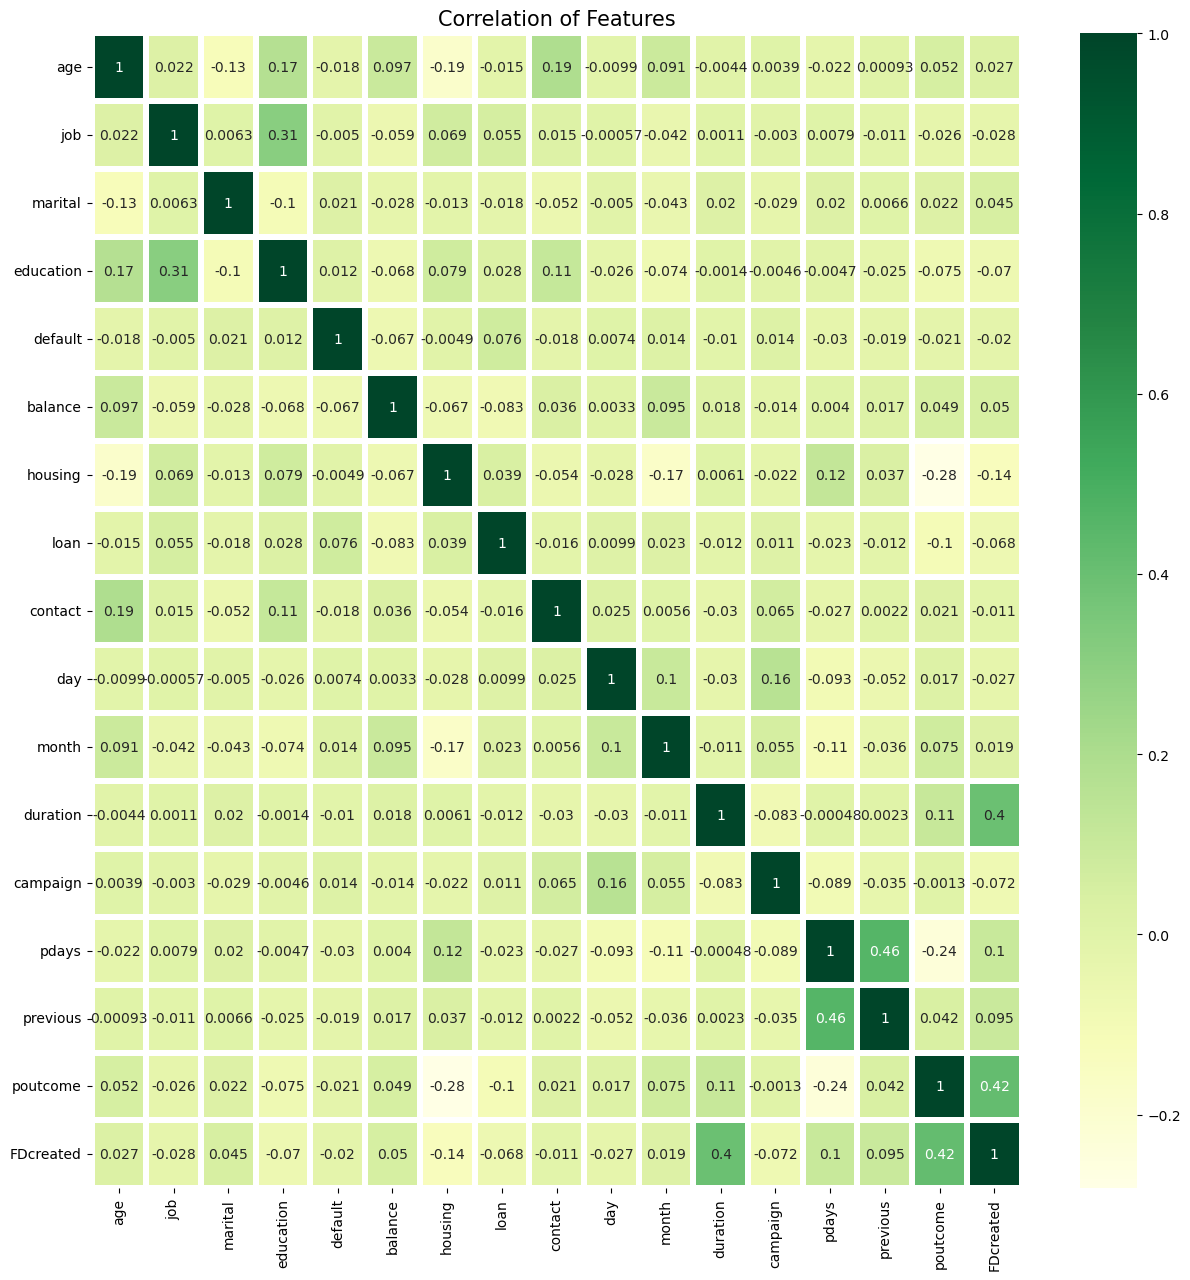

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the plot size by specifying figsize
fig, ax = plt.subplots(figsize=(15, 15))

# Create a heatmap
sns.heatmap(df.corr(),ax=ax, annot=True,linewidth=3 ,cmap="YlGn")

#plot title
plt.title("Correlation of Features", size=15, y=1)

# Show the plot
plt.show()

In [18]:
#Sorting correlation values in descending order by FDcreated attribute
df.corr()["FDcreated"].sort_values(ascending=False)

FDcreated    1.000000
poutcome     0.419028
duration     0.395099
pdays        0.103665
previous     0.094567
balance      0.049705
marital      0.045431
age          0.026939
month        0.019125
contact     -0.010817
default     -0.020336
day         -0.026821
job         -0.028155
loan        -0.068381
education   -0.069513
campaign    -0.072085
housing     -0.136070
Name: FDcreated, dtype: float64

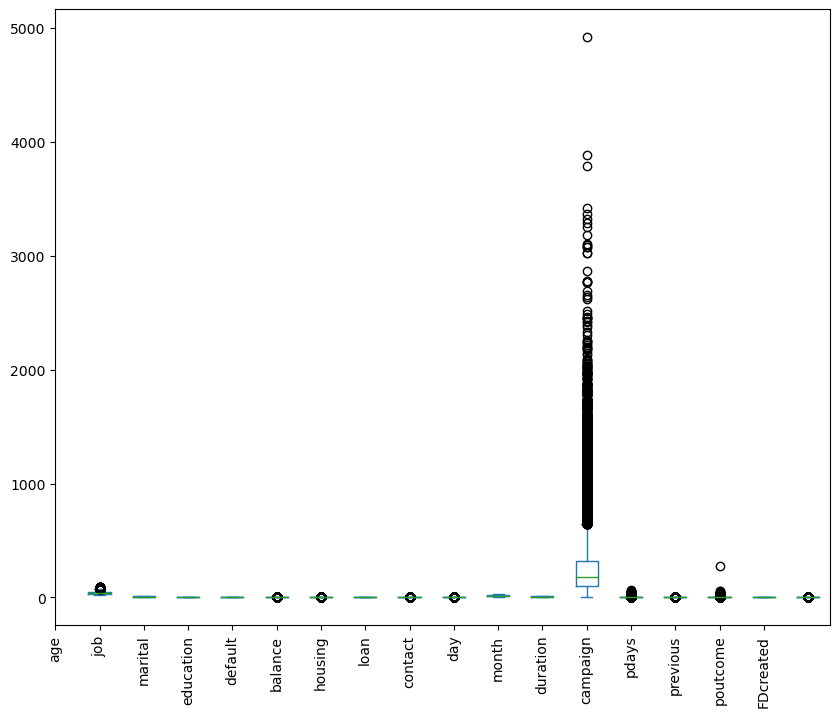

In [19]:
#Find outliers

fig, ax = plt.subplots(figsize=(10, 8))

# Create a box plot
df.plot.box(ax=ax)

# Set axis labels and ticks
plt.xticks(range(len(df.columns)), df.columns, rotation='vertical')

# Show the plot
plt.show()

In [20]:
#Drop unwanted columns
df.drop(columns=['contact','day', 'job','loan', 'education', 'campaign', 'housing', 'default'], axis = 'columns', inplace=True)

df

,age,marital,balance,month,duration,pdays,previous,poutcome,FDcreated
0,58,1,0.092259,5,261,0.000000,0,NaN,0
1,44,2,0.073067,5,151,0.000000,0,NaN,0
2,33,1,0.072822,5,76,0.000000,0,NaN,0
3,47,1,0.086476,5,92,0.000000,0,NaN,0
4,33,2,0.072812,5,198,0.000000,0,NaN,0
...,...,...,...,...,...,...,...,...,...
49727,33,1,0.069780,7,329,0.000000,0,NaN,0
49728,57,1,0.042725,5,153,0.000000,0,NaN,0
49729,57,1,0.075482,8,151,0.000000,0,NaN,0
49730,28,1,0.083126,2,129,0.243119,3,2.0,0


In [21]:
#drop NaN values
df = df.dropna()

df

,age,marital,balance,month,duration,pdays,previous,poutcome,FDcreated
24060,33,1,0.080811,10,39,0.174312,3,1.0,0
24062,42,2,0.070561,10,519,0.191514,1,2.0,1
24064,33,1,0.104071,10,144,0.105505,4,1.0,1
24072,36,1,0.094729,10,73,0.099771,4,2.0,0
24077,36,1,0.072803,10,140,0.165138,3,1.0,1
...,...,...,...,...,...,...,...,...,...
49703,32,2,0.075609,4,346,0.269495,3,1.0,0
49715,42,2,0.082609,5,951,0.425459,4,1.0,1
49725,38,1,0.083743,4,45,0.176606,1,1.0,0
49730,28,1,0.083126,2,129,0.243119,3,2.0,0


# Data Visualization

(1)Plot of the Created FD Account or not - Count

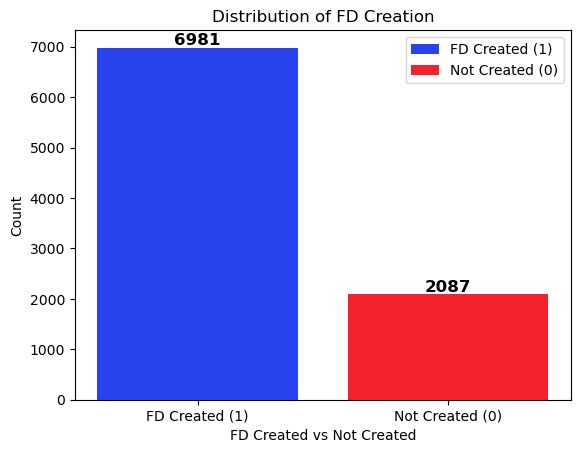

In [22]:
# Import Libraries
import matplotlib.pyplot as plt

# Count the occurrences of 1s and 0s in the 'FDcreated' column
fd_counts = df['FDcreated'].value_counts()

# Define custom colors for the bars
colors = ['#2843ed', '#f5222d']

# Create a bar plot with custom colors and labels
plt.bar(['FD Created (1)', 'Not Created (0)'], fd_counts.values, color=colors, label=['FD Created (1)', 'Not Created (0)'])

# Add labels to the bars
for i, count in enumerate(fd_counts):
    plt.text(i, count, f'{count}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add labels and title
plt.xlabel('FD Created vs Not Created')
plt.ylabel('Count')
plt.title('Distribution of FD Creation')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()


(2)Compare the ages of customers who took fixed deposit and who didn’t

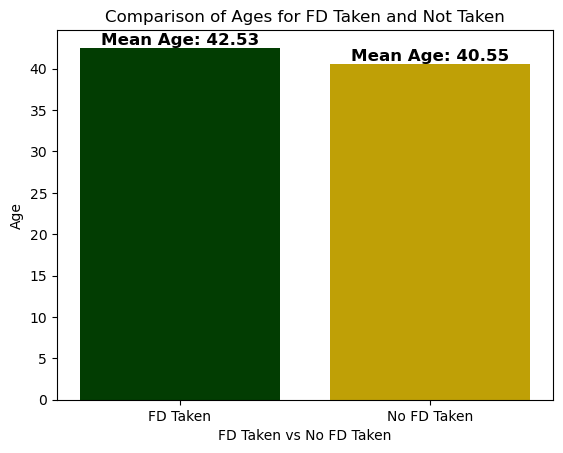

In [23]:
# import Libraries
import matplotlib.pyplot as plt

# Split the data into two groups: customers who took FD and those who didn't
fd_yes = df[df['FDcreated'] == 1]['age']
fd_no = df[df['FDcreated'] == 0]['age']

# Create a bar plot
plt.bar(['FD Taken', 'No FD Taken'], [fd_yes.mean(), fd_no.mean()], color=['#023d02', '#bfa006'])

# Add labels to the bars
plt.text(0, fd_yes.mean(), f'Mean Age: {fd_yes.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.text(1, fd_no.mean(), f'Mean Age: {fd_no.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add labels and title
plt.xlabel('FD Taken vs No FD Taken')
plt.ylabel('Age')
plt.title('Comparison of Ages for FD Taken and Not Taken')

# Show the plot
plt.show()


(3)Compare the duration of customers who took fixed deposit and who didn’t

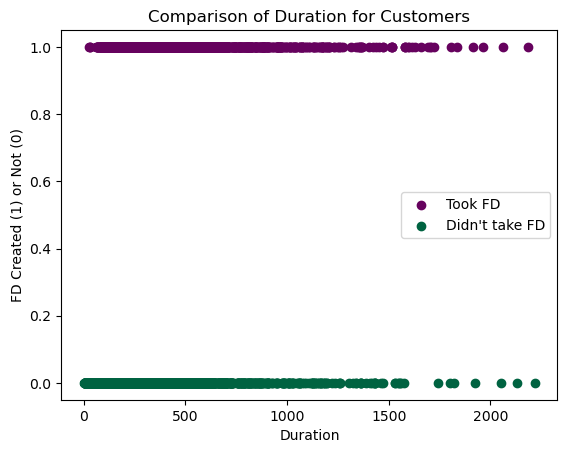

In [24]:
# imported Libraries
import matplotlib.pyplot as plt

# Assuming "df" is your DataFrame
df_yes_fd = df[df['FDcreated'] == 1]  # Selecting rows where FD was created
df_no_fd = df[df['FDcreated'] == 0]   # Selecting rows where FD was not created

# Scatter plot for customers who took fixed deposit
plt.scatter(df_yes_fd['duration'], df_yes_fd['FDcreated'], color='#66025e', label='Took FD')

# Scatter plot for customers who didn't take fixed deposit
plt.scatter(df_no_fd['duration'], df_no_fd['FDcreated'], color='#006341', label="Didn't take FD")

# Set labels and title
plt.xlabel('Duration')
plt.ylabel('FD Created (1) or Not (0)')
plt.title('Comparison of Duration for Customers')

# Add a legend
plt.legend()

# Show the plot
plt.show()

(4) Compare marital status column with FDcreated column

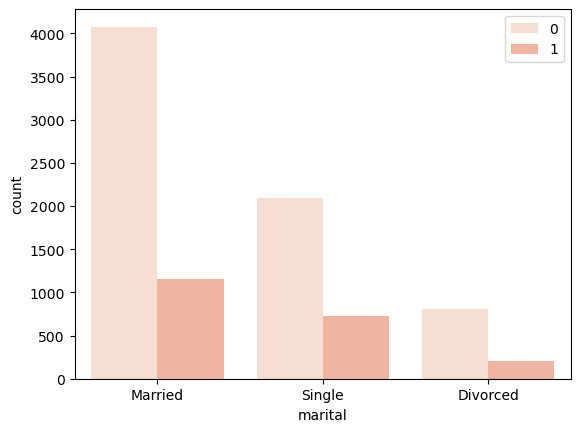

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

graphs = ['marital']

# Create a dictionary to map the marital status values to their string names
marital_status_map = {1: 'Married', 2: 'Single', 3: 'Divorced'}

# Create a copy of the DataFrame
df_copy = df.copy()

# Replace the marital status values in the copy of the DataFrame
df_copy['marital'].replace(marital_status_map, inplace=True)

# Count the occurrences of 1s and 0s in the 'FDcreated' column
y = df_copy['FDcreated']
y = y.values

for i in graphs:
  sns.countplot(x=i, hue=y, data=df_copy, palette=sns.color_palette('Reds'))
  plt.show()

(5) Plot a pie chart to show the fractions of FD created customers who recieved calls in different months 

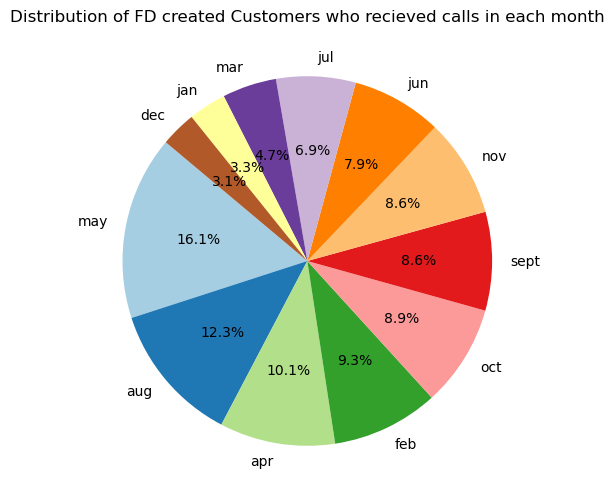

In [103]:
import matplotlib.pyplot as plt

# Define a mapping dictionary from month numbers to month names
month_mapping = {
    1: 'jan', 
    2: 'feb', 
    3: 'mar', 
    4: 'apr', 
    5: 'may', 
    6: 'jun', 
    7: 'jul', 
    8: 'aug', 
    9: 'sept', 
    10: 'oct', 
    11: 'nov', 
    12: 'dec'
}

# Group the data by 'month' and count the number of customers recieved calls for each month
month_counts = df[df['FDcreated'] == 1]['month'].map(month_mapping).value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(month_counts))))

# Add a title
plt.title('Distribution of FD created Customers who recieved calls in each month')

# Display the pie chart
plt.show()

(6) Compare the Age classes of the customers who subscribed for Fixed Deposits

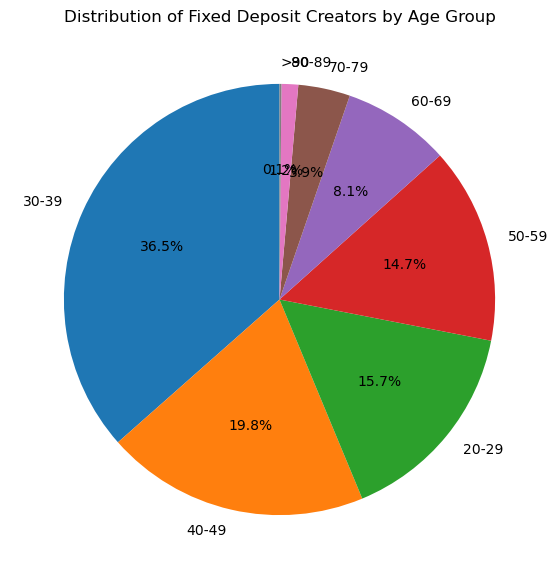

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to consider only those who created fixed deposits (FDcreated == 1)
created_deposits = df[df['FDcreated'] == 1]

# Define age groups (you can customize these as needed)
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '>90']

# Group the data by age groups and count the occurrences
age_groups = pd.cut(created_deposits['age'], bins=bins, labels=labels, right=False)
age_group_counts = age_groups.value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))  # Set the figure size
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fixed Deposit Creators by Age Group')

# Show the plot
plt.show()

# Model Training

In [28]:
#divide dataset into independent and dependent variables
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values 

In [29]:
#save dataset in new csv file
df.to_csv('df.csv', index=False)

In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Decision Tree classifier

In [31]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
# Assuming X_train and y_train are your training data
# and X_test and y_test are your test data

# Create a decision tree classifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [33]:
# Fit the decision tree classifier to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [34]:
# Make predictions on the test data
y_pred = dt.predict(X_test)

In [35]:
# Evaluate the predictions
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(conf_matrix)

Confusion Matrix:

[[1570  160]
 [ 227  310]]


Heap Map:



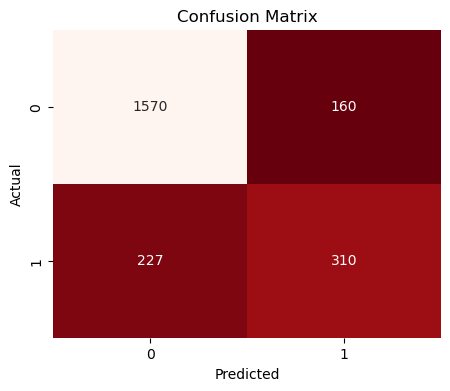

In [36]:
# Create a heatmap
print("Heap Map:\n")

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds_r', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

In [37]:
# Create classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1730
           1       0.66      0.58      0.62       537

    accuracy                           0.83      2267
   macro avg       0.77      0.74      0.75      2267
weighted avg       0.82      0.83      0.83      2267



In [38]:
# Calculate training error
dt_train_pred = dt.predict(X_train)
mse_train = mean_squared_error(y_train, dt_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
dt_test_pred = dt.predict(X_test)
mse_test = mean_squared_error(y_test, dt_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of Decision Tree Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of Decision Tree Model:", mse_test)

print()

print("Accuracy of Training and Testing data:\n")
print("Training Accuracy of Decision Tree Model Classifier:", train_accuracy)
print("Testing Accuracy of Decision Tree Model Classifier:", test_accuracy)

print()
print()

Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of Decision Tree Model: 0.1554183208351713
Mean Squared Error (MSE) on Testing Set of Decision Tree Model: 0.17071018967798854

Accuracy of Training and Testing data:

Training Accuracy of Decision Tree Model Classifier: 0.8445816791648287
Testing Accuracy of Decision Tree Model Classifier: 0.8292898103220114




Plot of Training and Testing Accuracy:


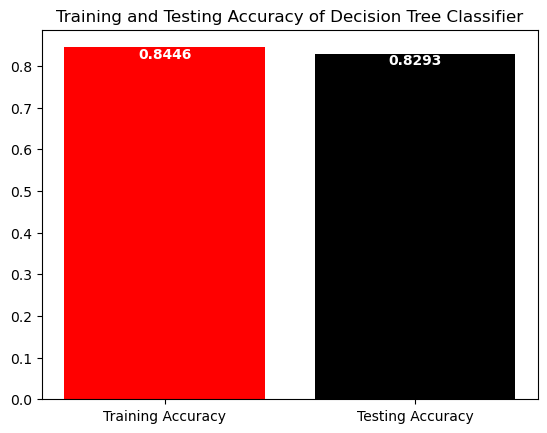

In [39]:
# Plotting training and testing accuracy
print("Plot of Training and Testing Accuracy:")

labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['red', 'black'])

# # Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of Decision Tree Classifier')
plt.show()


In [40]:
# # Create a pickle file for the model
dt_model_pickle = open('decision_tree_model.pkl', 'wb')
pickle.dump(dt, dt_model_pickle)
dt_model_pickle.close()

KNeighbors Classifier

In [41]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [42]:
# Assuming X_train and y_train are your training data
# and X_test and y_test are your test data

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [43]:
# Fit the KNN classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

In [45]:
# Evaluate the predictions
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap
print("Heap Map:\n")

Heap Map:



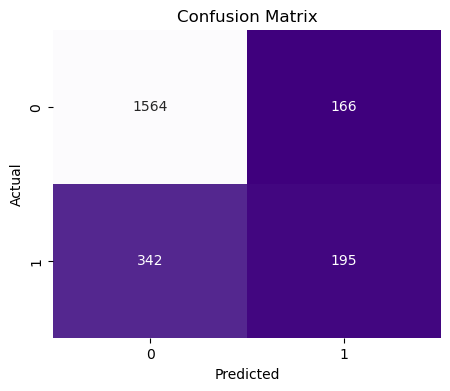

In [46]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples_r', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print()
print()

In [47]:
# Create classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1730
           1       0.54      0.36      0.43       537

    accuracy                           0.78      2267
   macro avg       0.68      0.63      0.65      2267
weighted avg       0.75      0.78      0.76      2267



In [48]:
# Calculate training error
knn_train_pred = knn.predict(X_train)
mse_train = mean_squared_error(y_train, knn_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
knn_test_pred = knn.predict(X_test)
mse_test = mean_squared_error(y_test, knn_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of KNeighborsClassifier Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of KNeighborsClassifier Model:", mse_test)

print()

print("Accuracy of Training and Testing data:\n")
print("Training Accuracy of KNeighborsClassifier Classifier:", train_accuracy)
print("Testing Accuracy of KNeighborsClassifier Classifier:", test_accuracy)

print()
print()

Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of KNeighborsClassifier Model: 0.15659461843846492
Mean Squared Error (MSE) on Testing Set of KNeighborsClassifier Model: 0.22408469342743714

Accuracy of Training and Testing data:

Training Accuracy of KNeighborsClassifier Classifier: 0.8434053815615351
Testing Accuracy of KNeighborsClassifier Classifier: 0.7759153065725628




Plot of Training and Testing Accuracy:


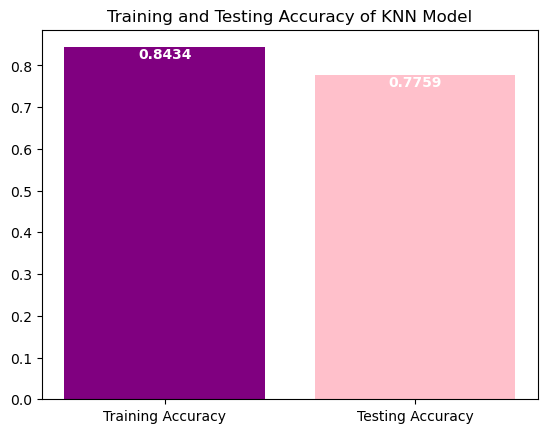

In [49]:
# Plotting training and testing accuracy
print("Plot of Training and Testing Accuracy:")

labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['purple', 'pink'])

# # Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of KNN Model')
plt.show()


In [50]:
# # Create a pickle file for the model
knn_model_pickle = open('knn_model.pkl', 'wb')
pickle.dump(knn, knn_model_pickle)
knn_model_pickle.close()

Linear Regression Model

In [51]:
# Import Libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

In [52]:
# Assuming y_train and y_test are your target variables for regression
threshold = 0.5

In [53]:
# Convert regression to classification
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

In [54]:
# Create the LinearRegression model
reg = LinearRegression()

In [55]:
# Train the model
reg.fit(X_train, y_train)

LinearRegression()

In [56]:
# Make predictions on the test set
reg_pred = reg.predict(X_test)

In [57]:
# Convert regression predictions to classification
reg_pred_class = np.where(reg_pred > threshold, 1, 0)

In [58]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, reg_pred_class)

print("Confusion Matrix:\n")
print(conf_matrix)

Confusion Matrix:

[[1623  107]
 [ 299  238]]


Heap Map:



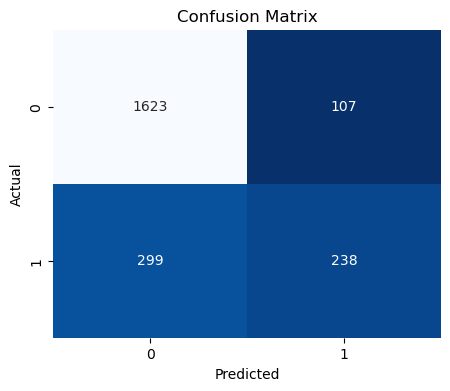

In [59]:
# Create a heatmap
print("Heap Map:\n")

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [60]:
# Create clasification Report
classification_rep = classification_report(y_test_class, reg_pred_class)

print("Clasification Report:\n")
print(classification_rep)

Clasification Report:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1730
           1       0.69      0.44      0.54       537

    accuracy                           0.82      2267
   macro avg       0.77      0.69      0.71      2267
weighted avg       0.81      0.82      0.81      2267



In [61]:
# Evaluate the model for regression (using Mean Squared Error)
mse = mean_squared_error(y_test, reg_pred)

# Compute training accuracy and error
reg_train_pred = reg.predict(X_train)
mse_train = mean_squared_error(y_train, reg_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing accuracy
lr_acc = 1 - mse


# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of Linear Regression Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of Linear Regression Model:", mse)

print()

print("Accuracy of Training and Testing data:\n")
print("Training Accuracy of Linear Regression Model Classifier:", train_accuracy)
print("Testing Accuracy of Linear Regression Model Classifier:", lr_acc)

print()
print()

Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of Linear Regression Model: 0.1266264365915709
Mean Squared Error (MSE) on Testing Set of Linear Regression Model: 0.13493370402272314

Accuracy of Training and Testing data:

Training Accuracy of Linear Regression Model Classifier: 0.8733735634084291
Testing Accuracy of Linear Regression Model Classifier: 0.8650662959772768




Plot of Training and Testing Accuracy:


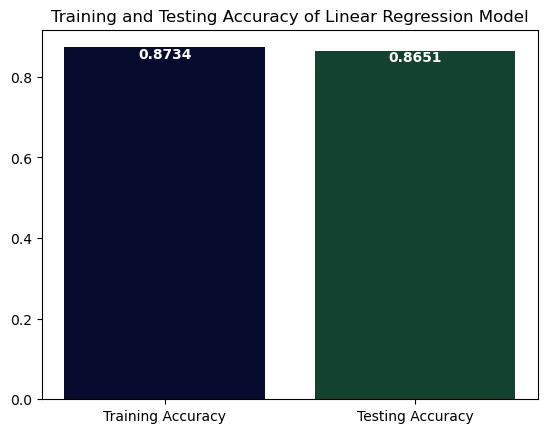

In [62]:
print("Plot of Training and Testing Accuracy:")


# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, lr_acc]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['#070b2e', '#13422f'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of Linear Regression Model')
plt.show()


In [63]:
# Create a pickle file for the model
linear_regression_pickle = open('linear_regression_model.pkl', 'wb')
pickle.dump(reg, linear_regression_pickle)
linear_regression_pickle.close()

Support Vector Machine

In [64]:
# Import Libraries
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [65]:
# Assuming y_train and y_test are your target variables for regression
threshold = 0.5 

In [66]:
# Convert regression to classification
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

In [67]:
# Create the SVM model
svm = SVC()

In [68]:
# Train the model
svm.fit(X_train, y_train_class)

SVC()

In [69]:
# Make predictions on the test set
svm_pred_class = svm.predict(X_test)

In [70]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, svm_pred_class)

print("Confusion Matrix:\n")
print(conf_matrix)

Confusion Matrix:

[[1675   55]
 [ 457   80]]


Heap Map:



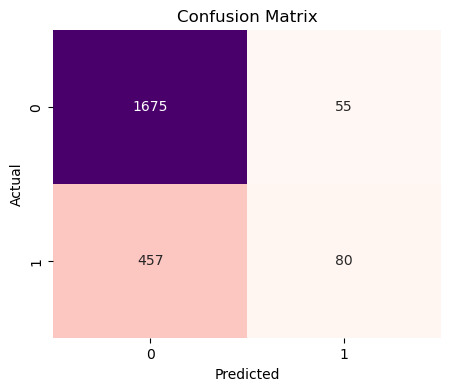

In [71]:
# Create a heatmap
print("Heap Map:\n")

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdPu', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [72]:
# Create classification Report

print("Clasification Report:\n")
classification_rep = classification_report(y_test_class, svm_pred_class)

print(classification_rep)

Clasification Report:

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1730
           1       0.59      0.15      0.24       537

    accuracy                           0.77      2267
   macro avg       0.69      0.56      0.55      2267
weighted avg       0.74      0.77      0.72      2267



In [73]:
# Calculate training error
svm_train_pred = svm.predict(X_train)
mse_train = mean_squared_error(y_train_class, svm_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
svm_test_pred = svm.predict(X_test)
mse_test = mean_squared_error(y_test_class, svm_test_pred)
test_accuracy = 1 - mse_test

print("Error of Training and Testing data:\n")
print("Training Error of SVM Model:", mse_train)
print("Testing Error of SVM Model:", mse_test)

print()

print("Accuracy of Training and Testing data:\n")
print("Training Accuracy of SVM Model:", train_accuracy)
print("Testing Accuracy of SVM Model:", test_accuracy)

Error of Training and Testing data:

Training Error of SVM Model: 0.21879135421261578
Testing Error of SVM Model: 0.2258491398323776

Accuracy of Training and Testing data:

Training Accuracy of SVM Model: 0.7812086457873842
Testing Accuracy of SVM Model: 0.7741508601676224


Plot of Training and Testing Accuracy:


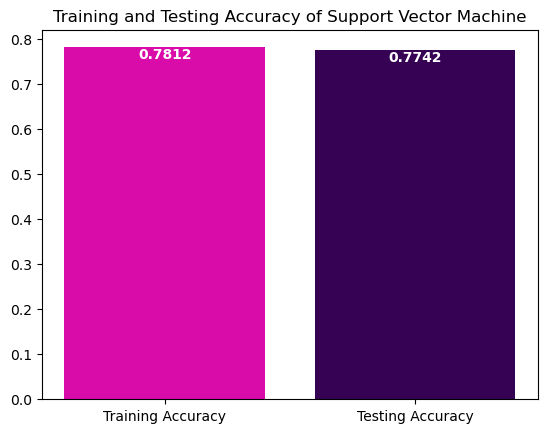

In [74]:
print("Plot of Training and Testing Accuracy:")

# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['#d90ba9', '#350254'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of Support Vector Machine')
plt.show()

In [75]:
# Create a pickle file for the model
svm_model_pickle = open('svm_model.pkl', 'wb')
pickle.dump(svm, svm_model_pickle)
svm_model_pickle.close()

Random Forest Classifier

In [76]:
#import the libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [77]:
# Assuming X_train and y_train are your training data and X_test and y_test are your test data

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')

In [78]:
# Fit the random forest classifier to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [79]:
# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the predictions
conf_matrix = confusion_matrix(y_test, y_pred)

Heap Map:



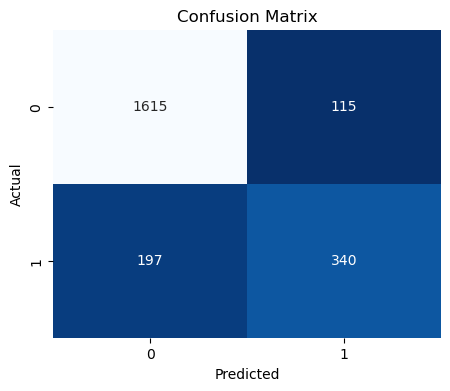

In [80]:
# Create a heatmap
print("Heap Map:\n")
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()
print()

In [81]:
# Create classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1730
           1       0.75      0.63      0.69       537

    accuracy                           0.86      2267
   macro avg       0.82      0.78      0.80      2267
weighted avg       0.86      0.86      0.86      2267



In [82]:
# Calculate training error
rf_train_pred = rf.predict(X_train)
mse_train = mean_squared_error(y_train, rf_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
rf_test_pred = rf.predict(X_test)
mse_test = mean_squared_error(y_test, rf_test_pred)
test_accuracy = 1 - mse_test

print("Mean Squared Error of the Training and Testing set:\n")
print("Training Error of Random Forest Model:", mse_train)
print("Testing Error of Random Forest Model:", mse_test)

print()

print("Accuracy of the Training and Testing set:\n")
print("Training Accuracy of Random Forest Model:", train_accuracy)
print("Testing Accuracy of Random Forest Model:", test_accuracy)

Mean Squared Error of the Training and Testing set:

Training Error of Random Forest Model: 0.0
Testing Error of Random Forest Model: 0.13762681958535508

Accuracy of the Training and Testing set:

Training Accuracy of Random Forest Model: 1.0
Testing Accuracy of Random Forest Model: 0.862373180414645


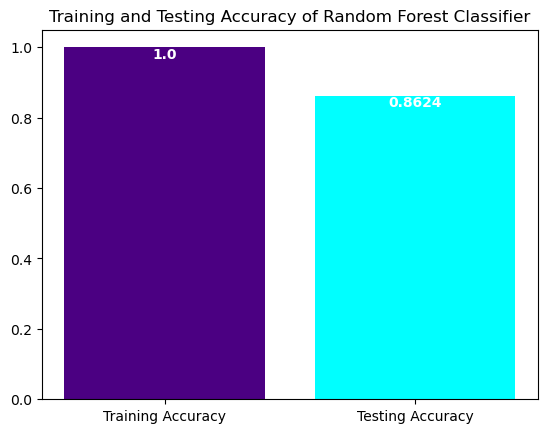

In [83]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['indigo', 'aqua'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of Random Forest Classifier')
plt.show()

In [84]:
# Create a pickle file for the model
rf_model_pickle = open('random_forest_model.pkl', 'wb')
pickle.dump(rf, rf_model_pickle)
rf_model_pickle.close()

Gaussian Naive Bayes Classifier

In [85]:
# import the libraries
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [86]:
# Assuming X_train and y_train are your training data and X_test and y_test are your test data

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

In [87]:
# Fit the Gaussian Naive Bayes classifier to the training data
gnb.fit(X_train, y_train)

GaussianNB()

In [88]:
# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate the predictions
conf_matrix = confusion_matrix(y_test, y_pred)

Heap Map:



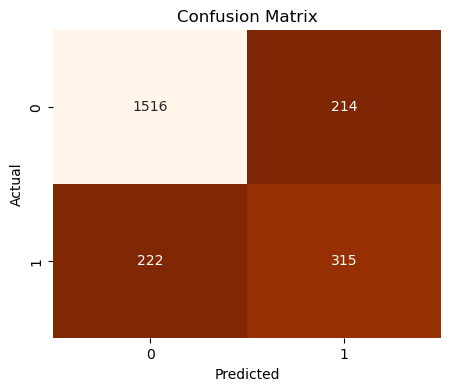

In [89]:
# Create a heatmap
print("Heap Map:\n")

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges_r', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print()
print()

In [90]:
# Create classification Report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1730
           1       0.60      0.59      0.59       537

    accuracy                           0.81      2267
   macro avg       0.73      0.73      0.73      2267
weighted avg       0.81      0.81      0.81      2267



In [91]:
# Calculate training error
gnb_train_pred = gnb.predict(X_train)
mse_train = mean_squared_error(y_train, gnb_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
gnb_test_pred = gnb.predict(X_test)
mse_test = mean_squared_error(y_test, gnb_test_pred)
test_accuracy = 1 - mse_test

print("Mean Squared Error of the Training and the Testing Set: \n")
print("Training Error of Gaussian Naive Bayes Model:", mse_train)
print("Testing Error of Gaussian Naive Bayes Model:", mse_test)

print()

print("Accuracy for the Training and the Testing Set: \n")
print("Training Accuracy of Gaussian Naive Bayes Model:", train_accuracy)
print("Testing Accuracy of Gaussian Naive Bayes Model:", test_accuracy)

Mean Squared Error of the Training and the Testing Set: 

Training Error of Gaussian Naive Bayes Model: 0.1837965005146302
Testing Error of Gaussian Naive Bayes Model: 0.19232465813850905

Accuracy for the Training and the Testing Set: 

Training Accuracy of Gaussian Naive Bayes Model: 0.8162034994853697
Testing Accuracy of Gaussian Naive Bayes Model: 0.8076753418614909


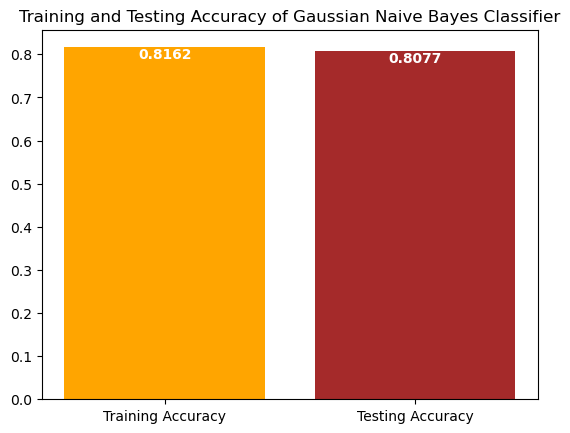

In [92]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['orange', 'brown'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of Gaussian Naive Bayes Classifier')
plt.show()

In [93]:
# Create a pickle file for the model
gnb_model_pickle = open('gaussian_naive_bayes_model.pkl', 'wb')
pickle.dump(gnb, gnb_model_pickle)
gnb_model_pickle.close()

Logistic Regression Model

In [94]:
# import the libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [95]:
# Assuming y_train and y_test are your target variables for regression
threshold = 0.5 

# Convert regression to classification
y_train_class = np.where(y_train > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

# Create the Logistic Regression model
log_reg = LogisticRegression()

In [96]:
# Train the model
log_reg.fit(X_train, y_train_class)

C:\Users\duudi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
# Make predictions on the test set
log_reg_pred_class = log_reg.predict(X_test)

Heap Map:



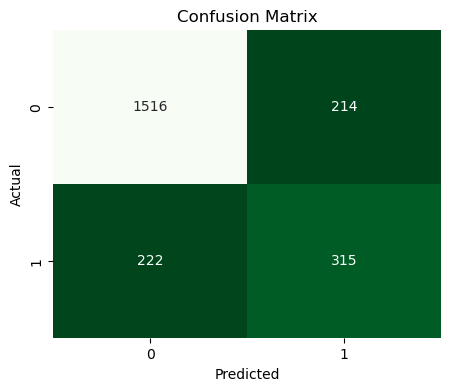

In [98]:
# Create a heatmap
print("Heap Map:\n")

fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens_r', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print()
print()

In [99]:
# Create classification Report
classification_rep = classification_report(y_test_class, log_reg_pred_class)

print(classification_rep)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1730
           1       0.68      0.48      0.56       537

    accuracy                           0.82      2267
   macro avg       0.77      0.70      0.72      2267
weighted avg       0.81      0.82      0.81      2267



In [100]:
# Calculate training error
log_reg_train_pred = log_reg.predict(X_train)
mse_train = mean_squared_error(y_train_class, log_reg_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
log_reg_test_pred = log_reg.predict(X_test)
mse_test = mean_squared_error(y_test_class, log_reg_test_pred)
test_accuracy = 1 - mse_test

print("Mean Squared Error of the Training and Testing Set:\n")
print("Training Error of Logistic Regression Model:", mse_train)
print("Testing Error of Logistic Regression Model:", mse_test)

print()

print("Accuracy of the Training and Testing Set:\n")
print("Training Accuracy of Logistic Regression Model:", train_accuracy)
print("Testing Accuracy of Logistic Regression Model:", test_accuracy)

Mean Squared Error of the Training and Testing Set:

Training Error of Logistic Regression Model: 0.16850463167181298
Testing Error of Logistic Regression Model: 0.1773268636965152

Accuracy of the Training and Testing Set:

Training Accuracy of Logistic Regression Model: 0.831495368328187
Testing Accuracy of Logistic Regression Model: 0.8226731363034848


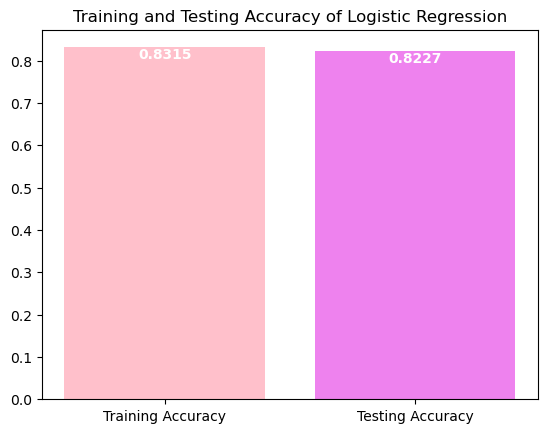

In [101]:
# Plotting training and testing accuracy
labels = ['Training Accuracy', 'Testing Accuracy']
values = [train_accuracy, test_accuracy]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['pink', 'violet'])

# Adding the numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom' if yval < 0.5 else 'top', ha='center', color='white', weight='bold')

plt.title('Training and Testing Accuracy of Logistic Regression')
plt.show()

In [102]:
# Create a pickle file for the model
log_reg_model_pickle = open('logistic_regression_model.pkl', 'wb')
pickle.dump(log_reg, log_reg_model_pickle)
log_reg_model_pickle.close()